# 训练集和测试集的分布差距

机器学习常见步骤

1.对数据集进行划分，分为训练集和测试集两部分；

2.对模型在测试集上面的泛化性能进行度量；

3.基于测试集上面的泛化性能，依据假设检验来推广到全部数据集上面的泛化性能。


##  1.KDE (核密度估计)分布图

C:\Users\Administrator\AppData\Local\Temp\ipykernel_278868\3193544935.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  test_feat, _ = np.random.multivariate_normal(test_mean, test_cov, size=50).T


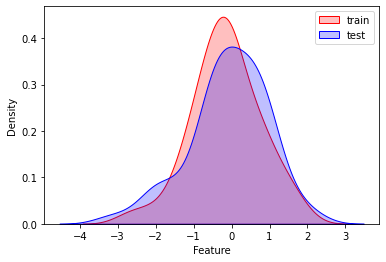

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建样例特征
train_mean, train_cov = [0, 2], [(1, .5), (.5, 1)]
test_mean, test_cov = [0, .5], [(1, 1), (.6, 1)]
train_feat, _ = np.random.multivariate_normal(train_mean, train_cov, size=50).T
test_feat, _ = np.random.multivariate_normal(test_mean, test_cov, size=50).T

# 绘KDE对比分布
sns.kdeplot(train_feat, shade = True, color='r', label = 'train')
sns.kdeplot(test_feat, shade = True, color='b', label = 'test')
plt.xlabel('Feature')
plt.legend()
plt.show()

In [2]:
train_feat

array([ 1.38344361,  0.23734988, -0.63976965, -0.81901126, -1.15209967,
       -0.37837165, -1.29437802,  0.74000058, -0.57523223, -1.29278175,
       -0.15351919, -0.69941778,  0.63843715, -1.20621758, -0.12485409,
        1.54816172, -0.02985711, -0.23845767,  0.74883395,  0.60864499,
       -0.69992079, -0.03984014, -0.74833941,  1.14629823,  1.26359279,
        0.13534323,  0.03631827,  1.82381181, -0.09035555, -0.36196891,
        0.30367811, -0.10705447,  0.22263107,  0.2818344 ,  0.72248825,
        0.03451492, -0.19233567, -0.68224752, -1.65759939, -2.68840715,
       -0.59737339, -0.64889786, -0.28965388, -0.68558441, -1.10020098,
       -2.13136472, -0.11079884, -0.18021612,  0.74009935,  0.87168708])

## 2.KS检验

In [3]:

from scipy import stats
stats.ks_2samp(train_feat, test_feat)

KstestResult(statistic=0.18, pvalue=0.3959398631708505)

若KS统计值小且p值大，则我们可以接受KS检验的原假设H0，即两个数据分布一致。

上面样例数据的统计值较低，p值大于10%但不是很高，因此反映分布略微不一致。

注意: p值<0.01，强烈建议拒绝原假设H0，p值越大，越倾向于原假设H0成立。